In [2]:
import numpy as np
from tight_binding.hamiltonians import create_bloch_hamiltonian_kagome
from tight_binding.utilities import compute_reciprocal_lattice_vectors_2D
import matplotlib.pyplot as plt
from matplotlib import cm

In [45]:
class bandstructure2D:
    """Contains all functionality to calculate the eigenvalues and -vectors."""
    def __init__(self,
        hamiltonian,
        a_1: np.ndarray,
        a_2: np.ndarray,
        n: int,
        bands: int=3  
    ):
        self.hamiltonian = hamiltonian
        self.a_1 = a_1
        self.a_2 = a_2
        self.b_1, self.b_2 = compute_reciprocal_lattice_vectors_2D(a_1,a_2)
        self.bands = bands
        self.n = n
        print(self.b_1)
        print(self.b_2)

    def compute_bandstructure(self):

        # Creating the required grids mapping from points in reciprocal space
        alpha_1 = np.linspace(0,1,self.n)
        alpha_2 = np.linspace(0,1,self.n)
        alpha_1, alpha_2 = np.meshgrid(alpha_1, alpha_2, indexing='ij')
        kx = alpha_1*self.b_1[0] + alpha_2*self.b_2[0]
        ky = alpha_1*self.b_1[1] + alpha_2*self.b_2[1]
        print(np.sum(kx < 0))
        energies = np.zeros(alpha_1.shape + (self.bands,), dtype='float')
        blochvectors = np.zeros(alpha_1.shape + (self.bands,self.bands), 
                                dtype='float')
        
        # Computing the right values for these grids
        for i in range(alpha_1.shape[0]):
            for j in range(alpha_1.shape[1]):
                k = np.array([kx[i,j], ky[i,j]])
                H = self.hamiltonian(k)
                eigenvalues, eigenvectors = np.linalg.eig(H)
                ind = np.argsort(eigenvalues) #sorting the energies
                eigenvalues = eigenvalues[ind]
                eigenvectors = eigenvectors[:,ind]
                for eigenvalue in range(len(eigenvalues)):
                    energies[i,j,eigenvalue] = eigenvalues[eigenvalue]
                    blochvectors[i,j,eigenvalue] = eigenvectors[:,eigenvalue]
        
        # Saving as class properties
        self.alpha_1 = alpha_1
        self.alpha_2 = alpha_2
        self.kx = kx
        self.ky = ky
        self.energies = energies
        self.blochvectors = blochvectors
    
    def plot_bandstructure(self, save):
        "Plots and saves the bandstructure." 
        E = np.transpose(self.energies, (2,0,1))
        
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        # Plot the surface.
        surf1 = ax.plot_surface(self.kx, self.ky, E[0], cmap=cm.coolwarm,
                            linewidth=0, antialiased=False)
        surf2 = ax.plot_surface(self.kx, self.ky, E[1], cmap=cm.coolwarm,
                            linewidth=0, antialiased=False)
        surf3 = ax.plot_surface(self.kx, self.ky, E[2], cmap=cm.coolwarm,
                            linewidth=0, antialiased=False)
        plt.savefig(save)
        plt.show()

In [46]:
H = create_bloch_hamiltonian_kagome(1,1,1,1,1)

In [48]:
bs = bandstructure2D(H,np.array([1,0]), np.array([0.5, 0.5*3**0.5]),100,3)

[ 6.28318531 -3.62759873]
[-0.          7.25519746]


In [49]:
bs.compute_bandstructure()

0


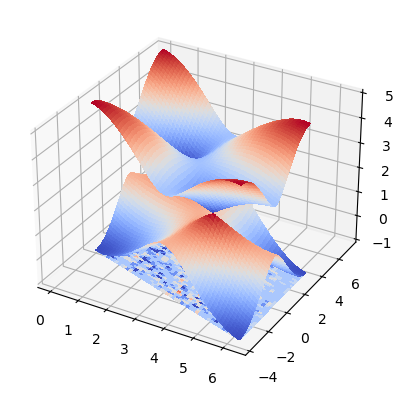

In [50]:
bs.plot_bandstructure('bandstructure2.png')

In [10]:
x = np.array([0,1,2,3,4,5,6,7])
y = np.array([0,2,4,6,8,10,12,14])

xgrid, ygrid = np.meshgrid(x,y)

In [11]:
xgrid

array([[0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7]])

In [12]:
ygrid

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  2,  2,  2,  2,  2,  2,  2],
       [ 4,  4,  4,  4,  4,  4,  4,  4],
       [ 6,  6,  6,  6,  6,  6,  6,  6],
       [ 8,  8,  8,  8,  8,  8,  8,  8],
       [10, 10, 10, 10, 10, 10, 10, 10],
       [12, 12, 12, 12, 12, 12, 12, 12],
       [14, 14, 14, 14, 14, 14, 14, 14]])

In [13]:
xgrid[1,2]

2

In [14]:
alpha_1 = np.linspace(0,1,10)
alpha_2 = np.linspace(0,1,10)
alpha_1, alpha_2 = np.meshgrid(alpha_1, alpha_2, indexing='ij')
alpha_1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111],
       [0.22222222, 0.22222222, 0.22222222, 0.22222222, 0.22222222,
        0.22222222, 0.22222222, 0.22222222, 0.22222222, 0.22222222],
       [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
        0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
       [0.44444444, 0.44444444, 0.44444444, 0.44444444, 0.44444444,
        0.44444444, 0.44444444, 0.44444444, 0.44444444, 0.44444444],
       [0.55555556, 0.55555556, 0.55555556, 0.55555556, 0.55555556,
        0.55555556, 0.55555556, 0.55555556, 0.55555556, 0.55555556],
       [0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667],
       [0.77777778, 0.77777778, 0.7777777

In [18]:
alpha_1.shape + (3,)

(10, 10, 3)